In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Data/IMDB-Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
#No null values are present 
df.isnull().sum()


review       0
sentiment    0
dtype: int64

In [12]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

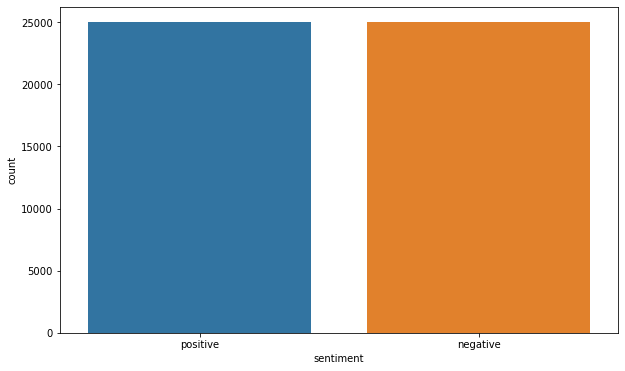

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['sentiment'])

## STEPS TO CLEAN THE REVIEWS :

<ul>
<li>Remove HTML tags</li>
<li>Remove special characters</li>
<li>Convert everything to lowercase</li>
<li>Remove stopwords</li>
<li>Stemming</li>
</ul>

In [24]:
import re

In [25]:
# remove tags using regular expression 
def removeTag(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned," ", text)

In [27]:
print(df['review'].iloc[0])
print()
print(removeTag(df['review'].iloc[0]))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [28]:
df['review'] = df['review'].apply(removeTag)

In [32]:
# removing special character using isalnum function 
def removeSpec(text):
    rem = ' '
    for i in text:
        if i.isalnum():
            rem = rem +i
        else:
            rem+= " "
    return rem
            

In [34]:
df['review'] = df['review'].apply(removeSpec)

In [35]:
# everything to lowercase
def toLower(text):
    return text.lower()

In [36]:
df['review'] = df['review'].apply(toLower)

In [38]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [39]:
#removing stop words
def removeStopWords(text):
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stopWords]

In [40]:
df['review'] = df['review'].apply(removeStopWords)

In [41]:
from nltk.stem import SnowballStemmer

In [43]:
# Stemming words in dataset
def stemming(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

In [46]:
df['review'] = df['review'].apply(stemming) 

In [47]:
 from sklearn.feature_extraction.text import CountVectorizer

In [54]:
X = np.array(df.iloc[:,0].values)
y = np.array(df.sentiment.values)
cv = CountVectorizer(max_features=1000)
X = cv.fit_transform(df['review']).toarray()

In [55]:
print(f" Shape of X : {X.shape}")
print(f" Shape of y : {y.shape}")

 Shape of X : (50000, 1000)
 Shape of y : (50000,)


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=101)

In [58]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [59]:
GNB.fit(train_X,train_y)

GaussianNB()

In [60]:
predictions = GNB.predict(test_X)

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

    negative       0.76      0.84      0.80      7474
    positive       0.82      0.74      0.78      7526

    accuracy                           0.79     15000
   macro avg       0.79      0.79      0.79     15000
weighted avg       0.79      0.79      0.79     15000



In [63]:
testReview = "It was good movie and actor was fantastic and movie has plenty breathtaking action scenes"

In [64]:
testReview = removeTag(testReview)
testReview=removeStopWords(testReview)
testReview = removeSpec(testReview)
testReview = stemming(testReview)
testReview = toLower(testReview)

In [65]:
import pickle

In [66]:
bow,words = [],word_tokenize(testReview)
for word in words:
    bow.append(words.count(word))
word_dict = cv.vocabulary_
pickle.dump(word_dict,open('bow.pkl','wb'))

In [69]:
inp = []
for i in word_dict:
    inp.append(testReview.count(i[0]))
y_pred = GNB.predict(np.array(inp).reshape(1,1000))

In [71]:
print(y_pred)

['positive']
